In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
import datetime
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from imblearn.combine import SMOTEENN


In [ ]:
df = pd.read_csv("IKU JAKARTA 2021.csv")


In [ ]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,1/1/2021,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53.0,PM25,SEDANG
1,1/2/2021,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47.0,O3,BAIK
2,1/3/2021,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58.0,PM25,SEDANG
3,1/4/2021,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48.0,PM25,BAIK
4,1/5/2021,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53.0,PM25,SEDANG


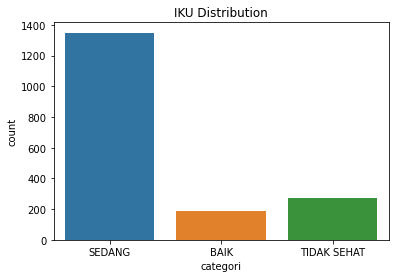

In [ ]:
#VISUALISASI
# Count plot for the 'diabetes' variable
sns.countplot(x='categori', data=df)
plt.title('IKU Distribution')
plt.show()

In [ ]:
df['tanggal'] = df['tanggal'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%Y-%m'))

In [ ]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53.0,PM25,SEDANG
1,2021-01,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47.0,O3,BAIK
2,2021-01,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58.0,PM25,SEDANG
3,2021-01,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48.0,PM25,BAIK
4,2021-01,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53.0,PM25,SEDANG


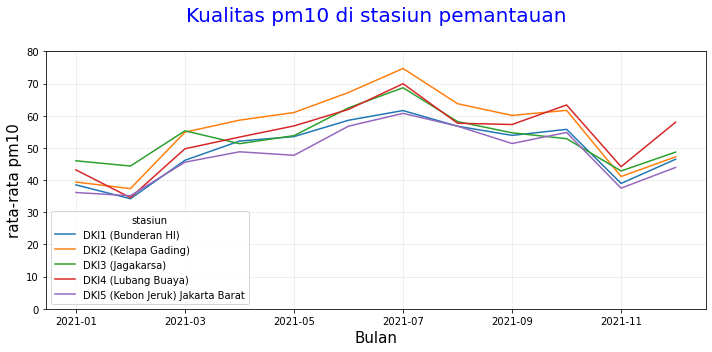

In [ ]:
df.groupby(['tanggal', 'stasiun'])['pm10'].mean() .unstack().plot()
plt.title('Kualitas pm10 di stasiun pemantauan', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('rata-rata pm10', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

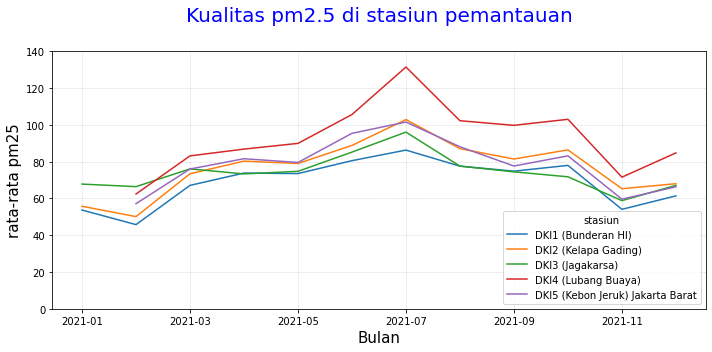

In [ ]:
df.groupby(['tanggal', 'stasiun'])['pm25'].mean() .unstack().plot()
plt.title('Kualitas pm2.5 di stasiun pemantauan', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('rata-rata pm25', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

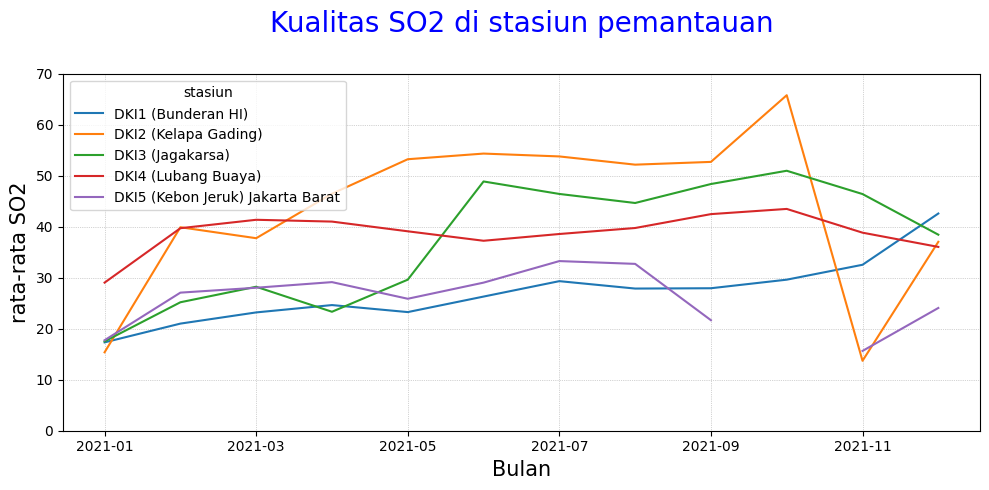

In [ ]:
df.groupby(['tanggal', 'stasiun'])['so2'].mean() .unstack().plot()
plt.title('Kualitas SO2 di stasiun pemantauan', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('rata-rata SO2', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

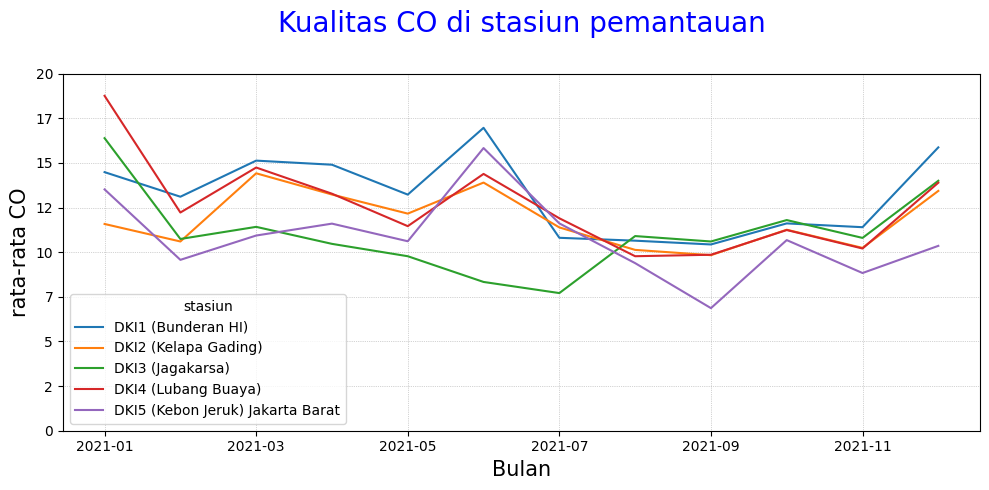

In [ ]:
df.groupby(['tanggal', 'stasiun'])['co'].mean() .unstack().plot()
plt.title('Kualitas CO di stasiun pemantauan', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('rata-rata CO', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

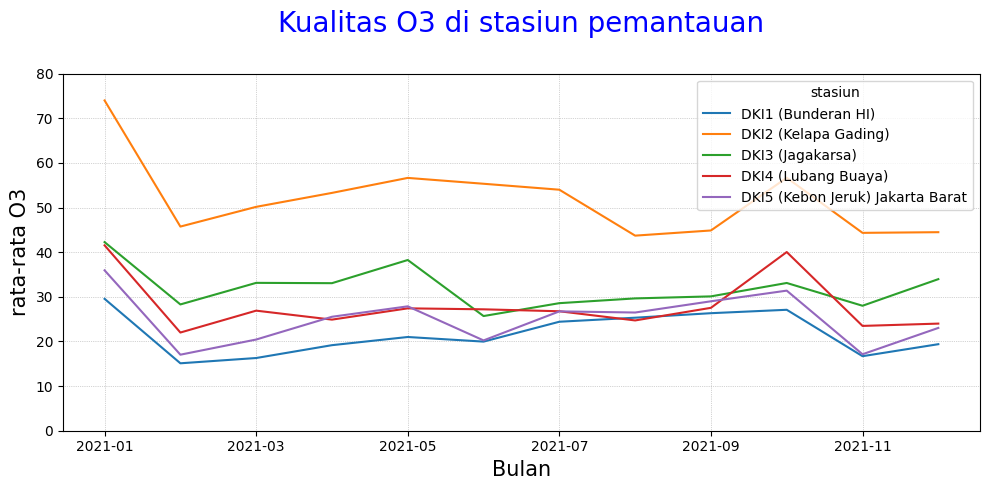

In [ ]:
df.groupby(['tanggal', 'stasiun'])['o3'].mean() .unstack().plot()
plt.title('Kualitas O3 di stasiun pemantauan', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('rata-rata O3', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

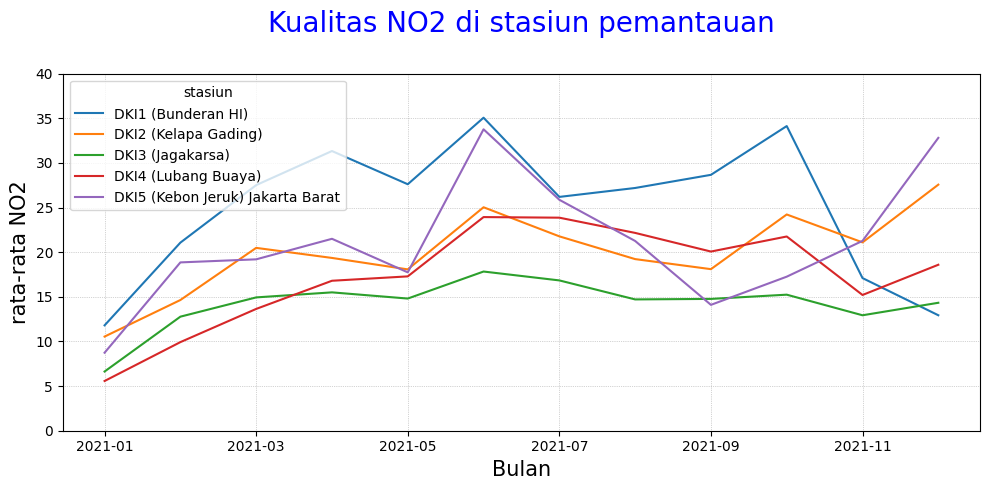

In [ ]:
df.groupby(['tanggal', 'stasiun'])['no2'].mean() .unstack().plot()
plt.title('Kualitas NO2 di stasiun pemantauan', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('rata-rata NO2', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

PREPOCESING DATA

In [ ]:
# Checking null values
print(df.isnull().sum())

tanggal      0
stasiun      0
pm10        52
pm25        84
so2         98
co          20
o3          52
no2         19
max          1
critical     0
categori     0
dtype: int64


Text(0.5, 1.0, 'Distribution of Missing values')

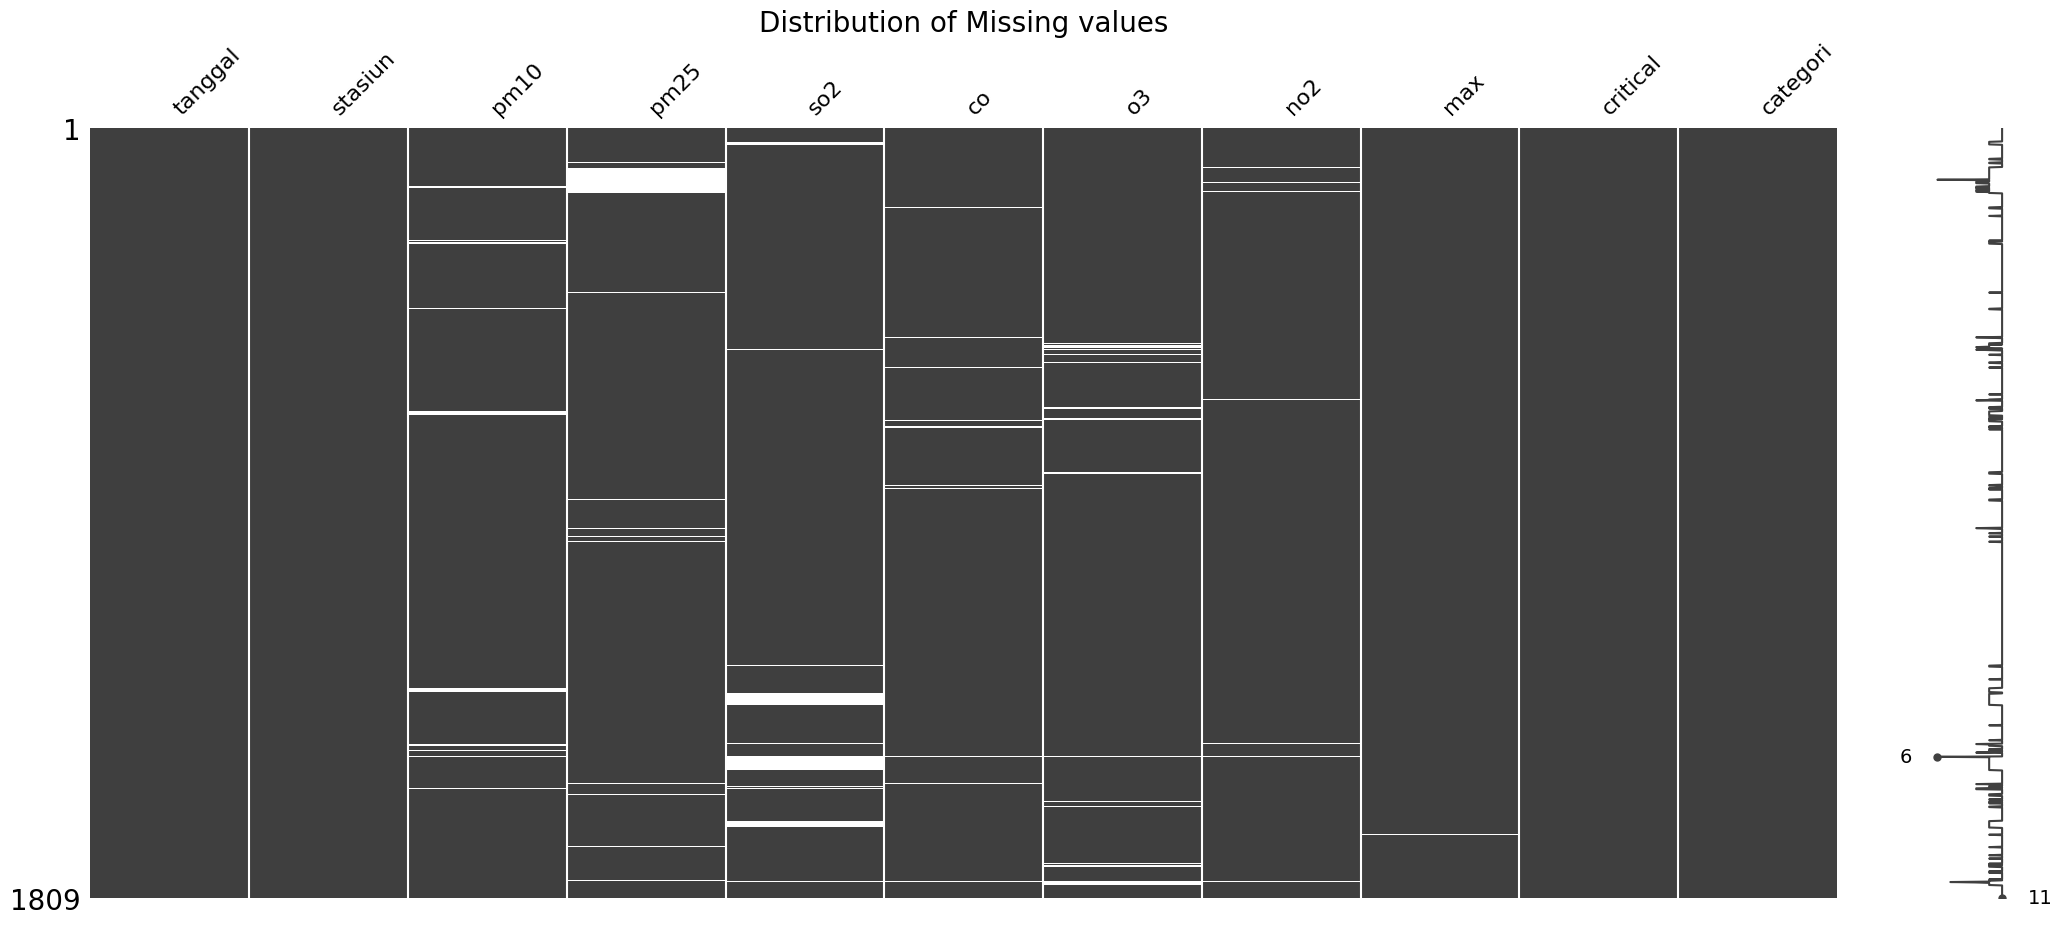

In [ ]:
msno.matrix(df)
plt.title('Distribution of Missing values',fontsize = 20)


In [ ]:
mean = df["pm10"].mean()
df["pm10"] = df["pm10"].replace(np.nan, mean)
mean = df["pm25"].mean()
df["pm25"] = df["pm25"].replace(np.nan, mean)
mean = df["so2"].mean()
df["so2"] = df["so2"].replace(np.nan, mean)
mean = df["co"].mean()
df["co"] = df["co"].replace(np.nan, mean)
mean = df["o3"].mean()
df["o3"] = df["o3"].replace(np.nan, mean)
mean = df["no2"].mean()
df["no2"] = df["no2"].replace(np.nan, mean)

In [ ]:
print(df.isnull().sum())

tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         1
critical    0
categori    0
dtype: int64


In [ ]:
df.to_csv('dafid.csv')

Text(0.5, 1.0, 'Distribution of Missing values')

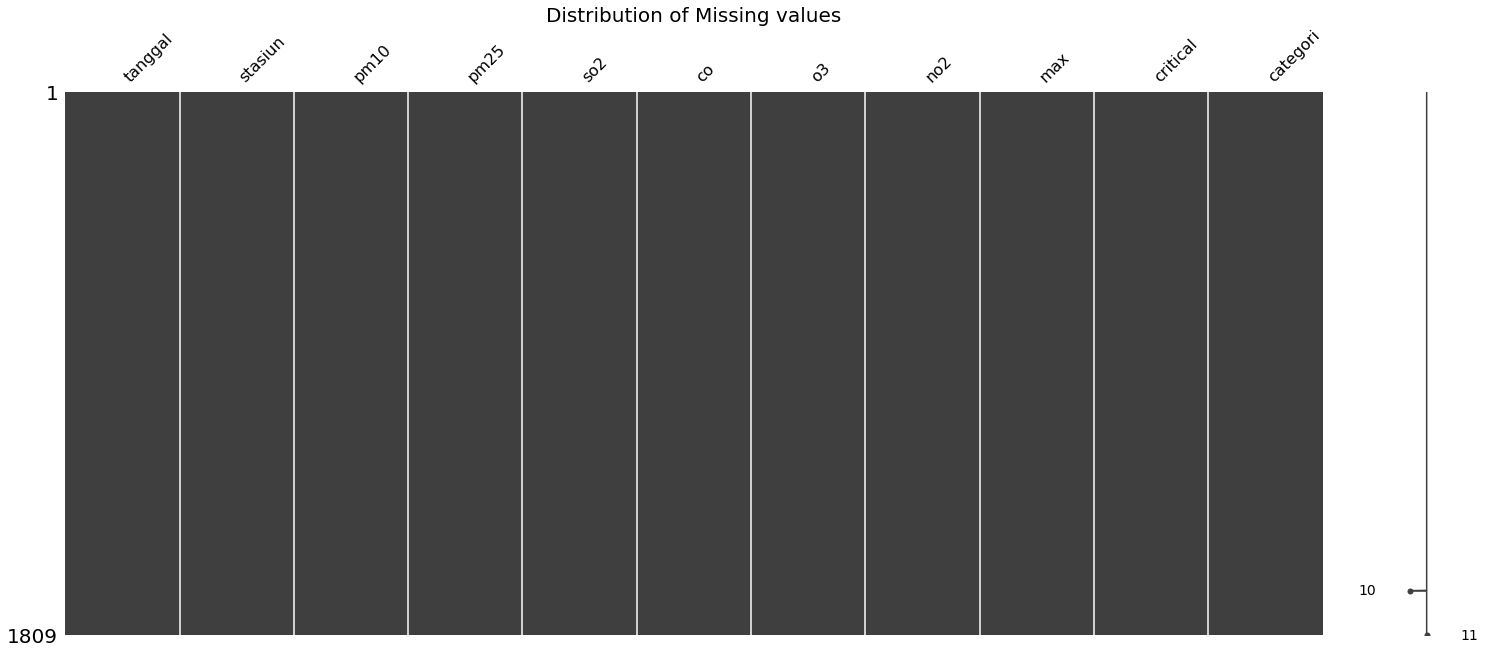

In [ ]:
msno.matrix(df)
plt.title('Distribution of Missing values',fontsize = 20)

In [ ]:
df = df.drop(['tanggal','stasiun','max', 'critical'], axis=1)


Text(0.5, 1.0, 'Distribution of Missing values')

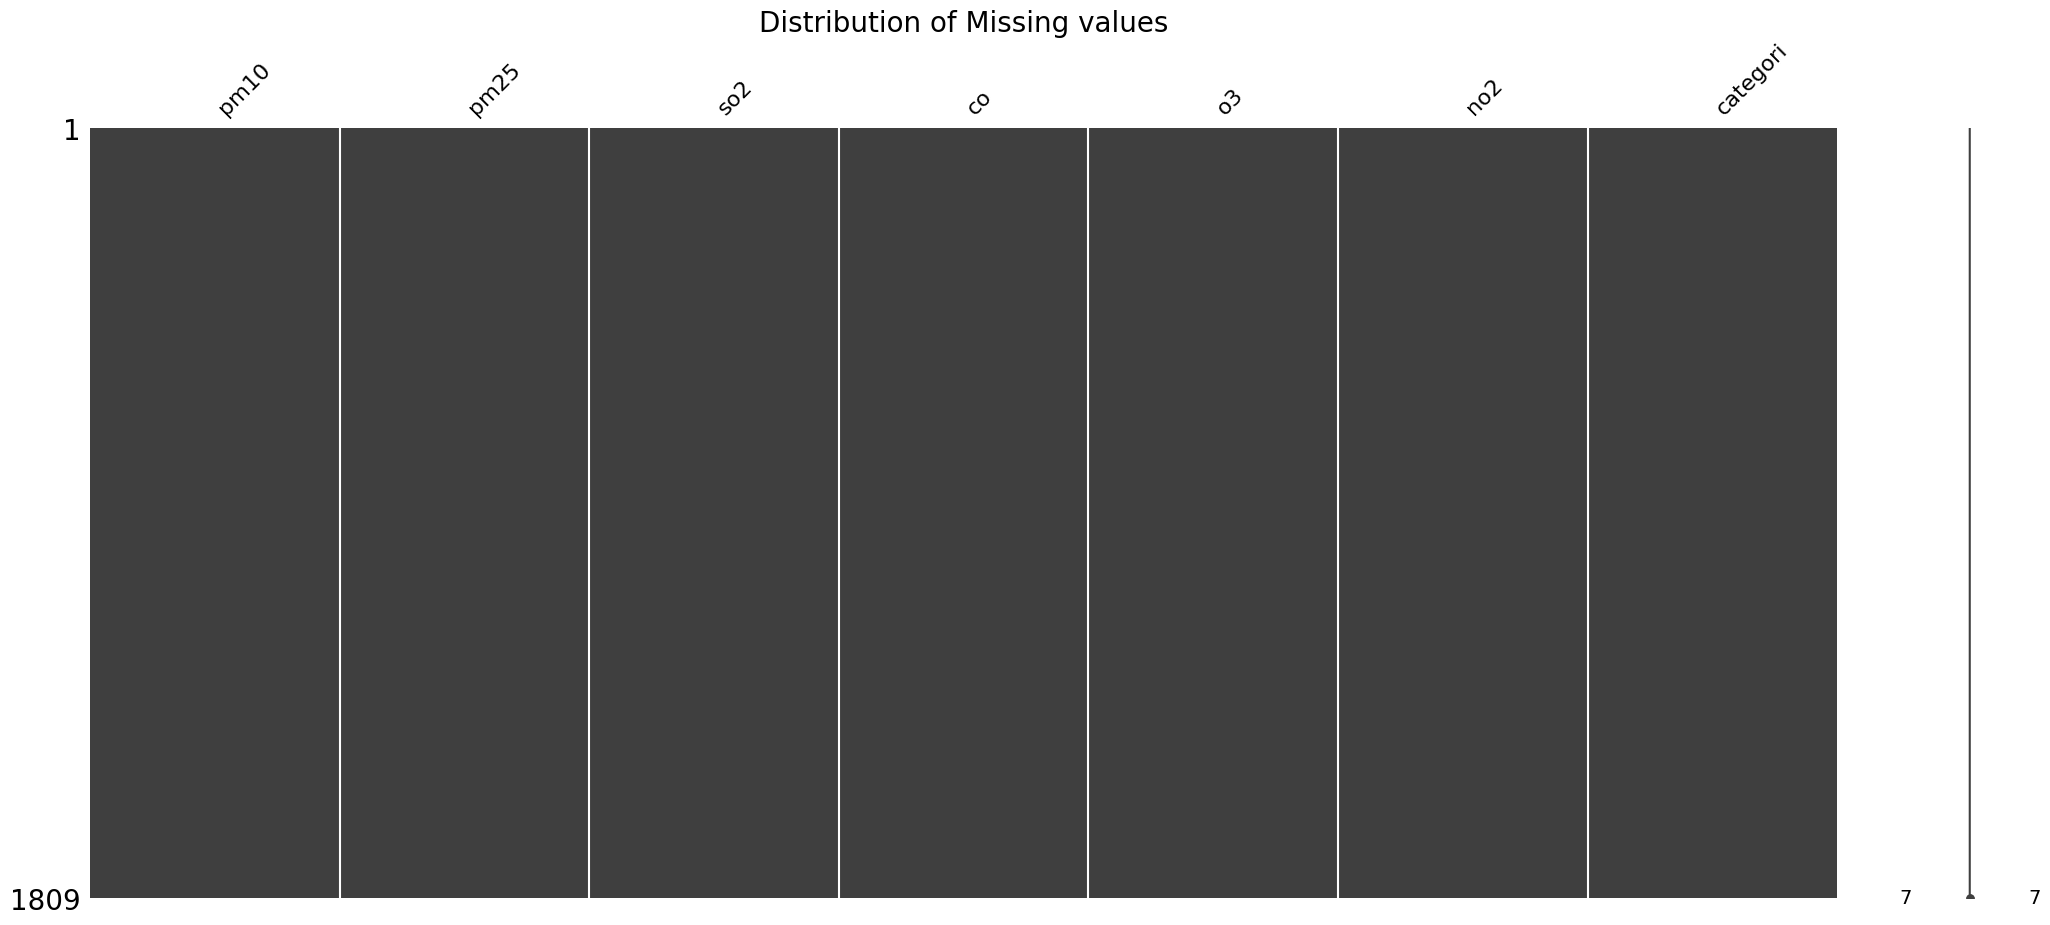

In [ ]:
msno.matrix(df)
plt.title('Distribution of Missing values',fontsize = 20)

In [ ]:
df.head()

,pm10,pm25,so2,co,o3,no2,categori
0,38.0,53.0,29.0,6.0,31.0,13.0,SEDANG
1,27.0,46.0,27.0,7.0,47.0,7.0,BAIK
2,44.0,58.0,25.0,7.0,40.0,13.0,SEDANG
3,30.0,48.0,24.0,4.0,32.0,7.0,BAIK
4,38.0,53.0,24.0,6.0,31.0,9.0,SEDANG


In [ ]:
LE = LabelEncoder()
df['categori'] = LE.fit_transform(df['categori'])

In [ ]:
df.head()

,pm10,pm25,so2,co,o3,no2,categori
0,38.0,53.0,29.0,6.0,31.0,13.0,1
1,27.0,46.0,27.0,7.0,47.0,7.0,0
2,44.0,58.0,25.0,7.0,40.0,13.0,1
3,30.0,48.0,24.0,4.0,32.0,7.0,0
4,38.0,53.0,24.0,6.0,31.0,9.0,1


ANALISIS RF DENGAN HYPERPARAMETRIK

In [ ]:
X = df.drop(columns='categori',axis=1)
y = df['categori']

In [ ]:
X


,pm10,pm25,so2,co,o3,no2
0,38.0,53.0,29.0,6.0,31.0,13.0
1,27.0,46.0,27.0,7.0,47.0,7.0
2,44.0,58.0,25.0,7.0,40.0,13.0
3,30.0,48.0,24.0,4.0,32.0,7.0
4,38.0,53.0,24.0,6.0,31.0,9.0
...,...,...,...,...,...,...
1804,54.0,76.0,36.0,14.0,21.0,47.0
1805,44.0,68.0,20.0,11.0,21.0,33.0
1806,34.0,54.0,28.0,8.0,25.0,29.0
1807,53.0,75.0,25.0,15.0,23.0,44.0


In [ ]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1804    1
1805    1
1806    1
1807    1
1808    1
Name: categori, Length: 1809, dtype: int64

In [ ]:
#SPLIT DATA YANG DIGUNAKAN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (1447, 6)
y_train : (1447,)
X_test : (362, 6)
y_test : (362,)


In [ ]:
# Number of trees in random forest

n_estimators = [100,200,300, 400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [ 2, 4, 6 ]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2,3,4,5,6,7]


In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
}
print(param_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 3, 4, 5, 6, 7]}


In [ ]:
rf_Model = RandomForestClassifier(random_state=1)

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2)

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_Model_best = RandomForestClassifier(n_estimators=200,  max_depth=8, max_features='auto', min_samples_leaf=2, min_samples_split= 2)

In [ ]:
rf_Model_best.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', min_samples_leaf=2,
                       n_estimators=200)

In [ ]:
rf_Model_best.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1533543146),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=692378518),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=65258423),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=180871844),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=653974934),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=986163320),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1295046628),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_s

In [ ]:
print(len(rf_Model_best.estimators_))

200


In [ ]:
fn = ['pm10','pm25','so2','co','o3','no2']
cn = ['BAIK', 'SEDANG','TIDAK SEHAT']

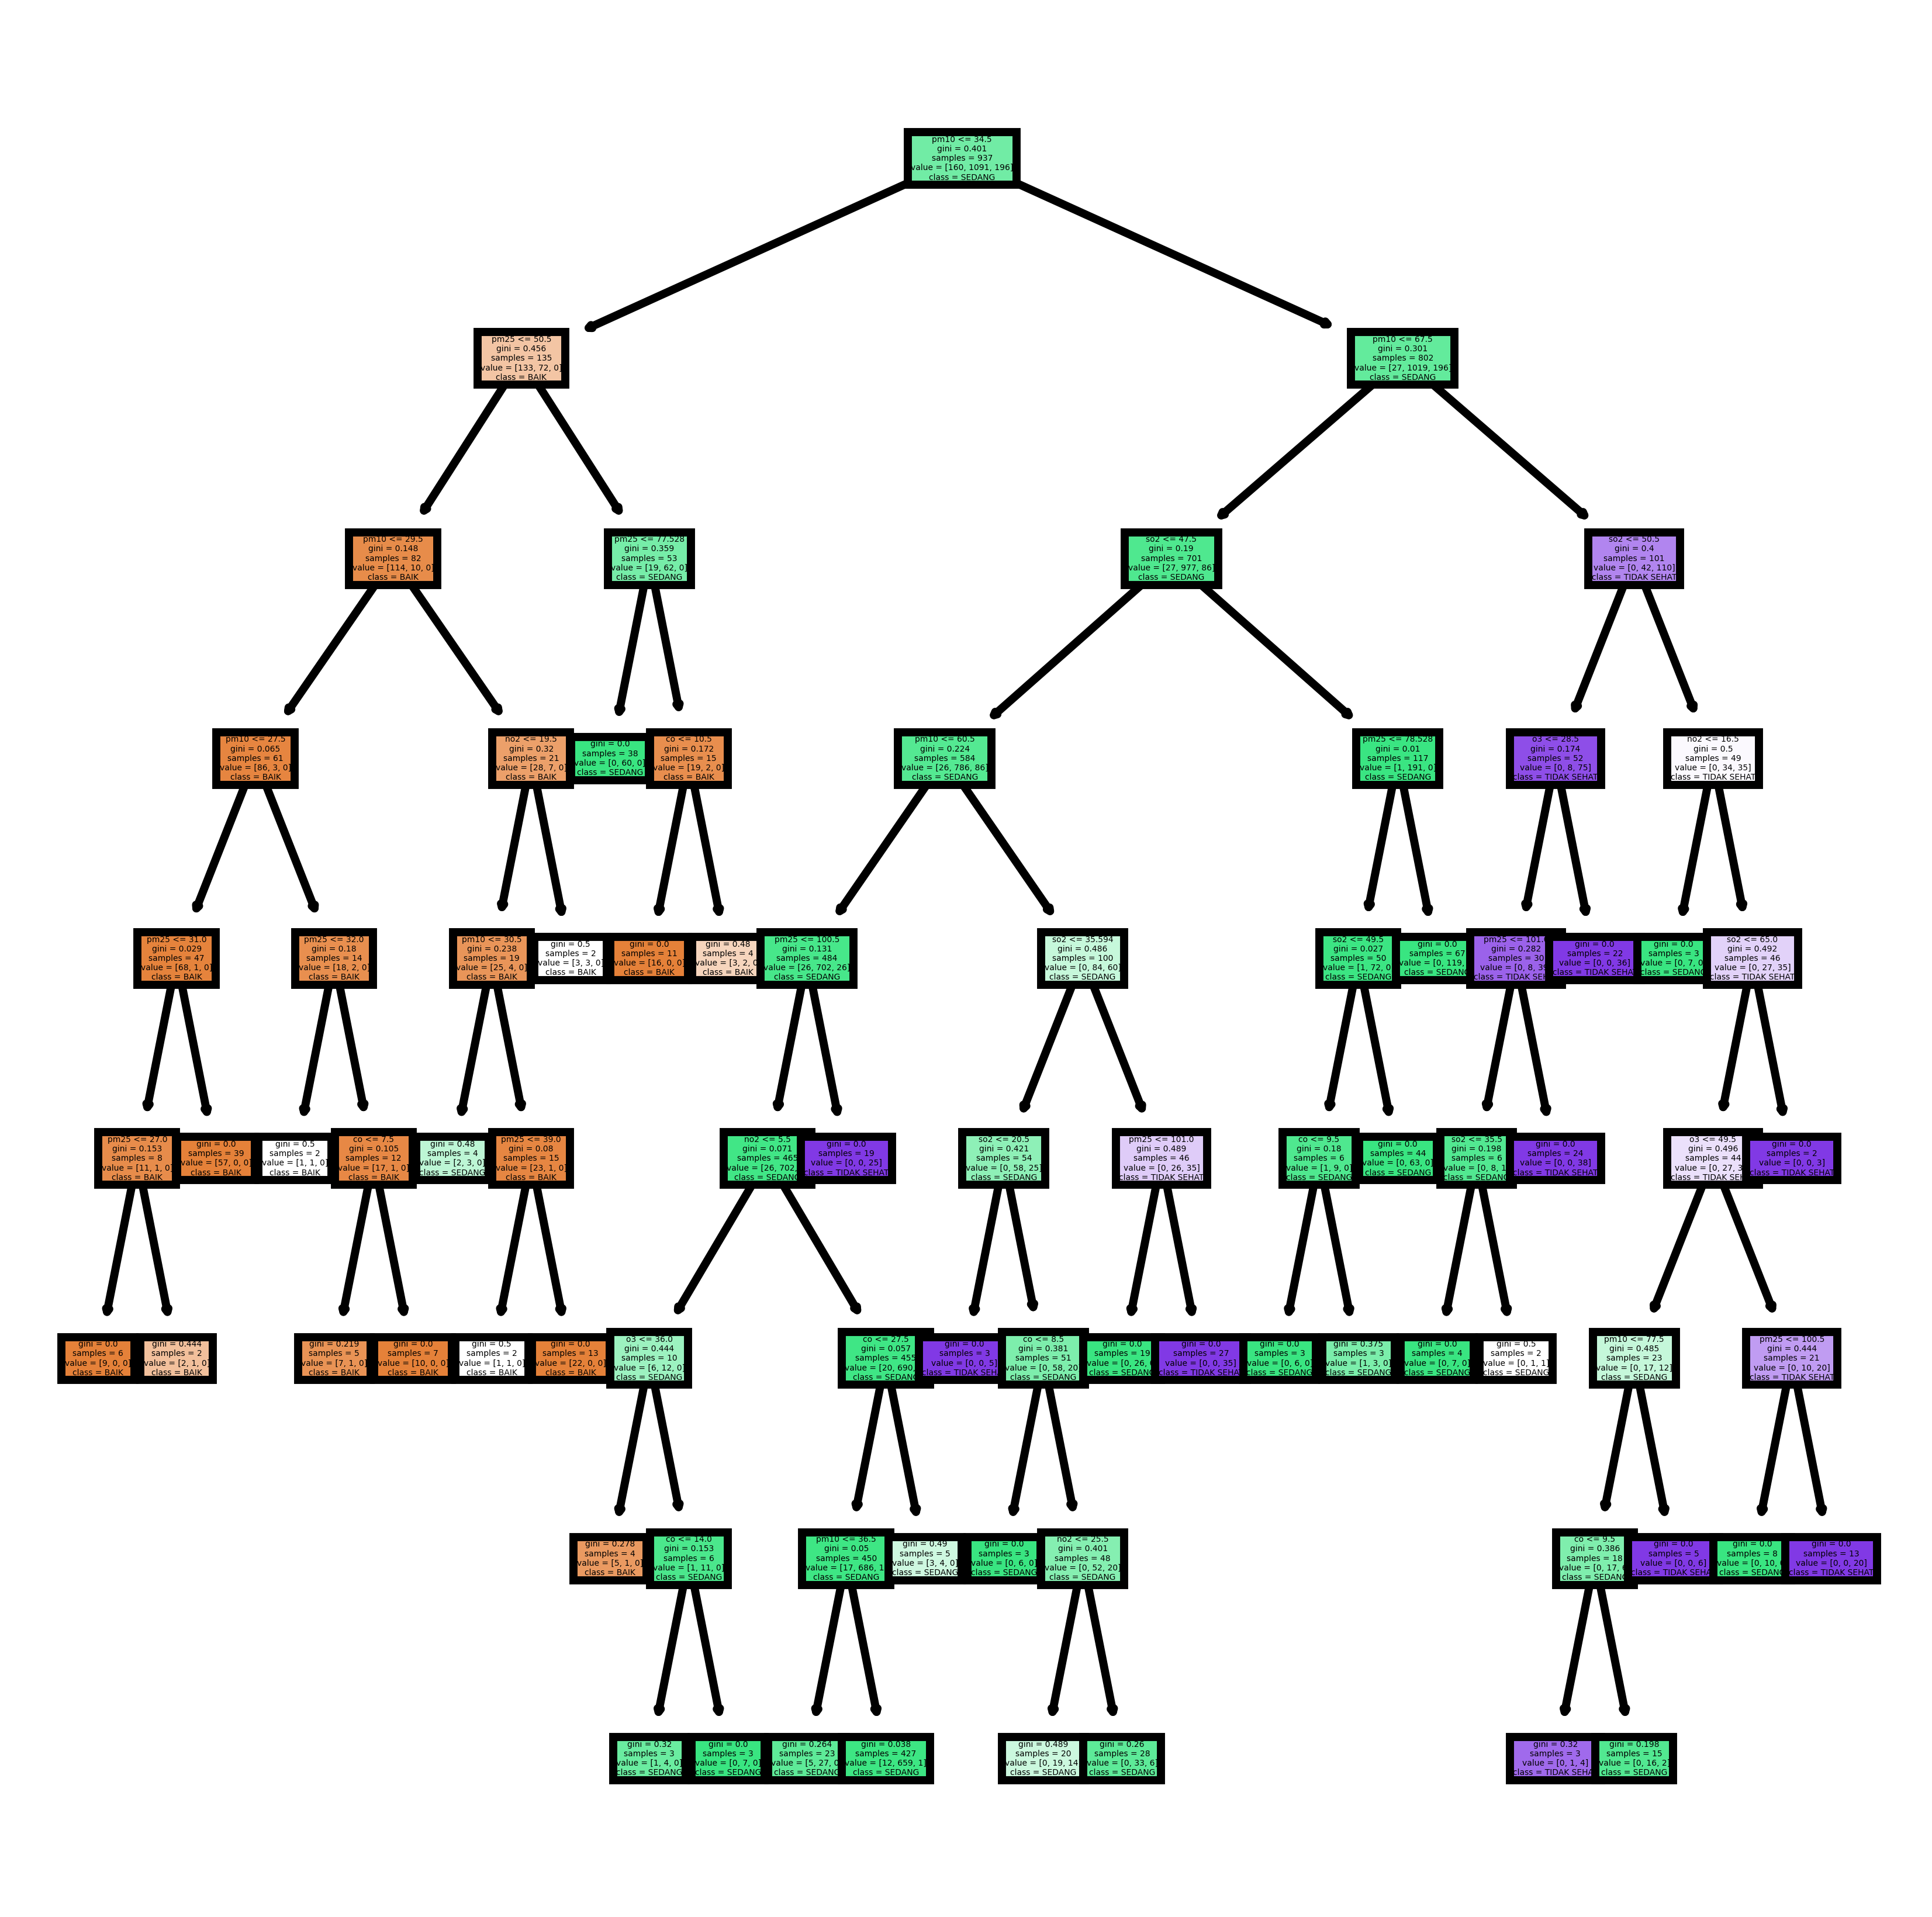

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(rf_Model_best.estimators_[1],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
import pickle
with open ('rf_model.pickle','wb') as f:
 pickle.dump(rf_Model_best,f)
with open ('rf_model.pickle','rb') as f:
 model = pickle.load(f)
model

RandomForestClassifier(max_depth=8, max_features='auto', min_samples_leaf=2,
                       n_estimators=200)

In [ ]:
val_preds = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

In [ ]:
val_preds

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pred_prob

array([[2.98349705e-03, 9.96248014e-01, 7.68489284e-04],
       [2.28184601e-02, 9.71733210e-01, 5.44832944e-03],
       [9.68336367e-01, 3.16636329e-02, 0.00000000e+00],
       ...,
       [3.40462791e-02, 9.64756537e-01, 1.19718351e-03],
       [1.20793404e-02, 9.82418862e-01, 5.50179718e-03],
       [2.63775997e-03, 9.81812472e-01, 1.55497677e-02]])

In [ ]:
print (f'Train Accuracy - : {model.score(X_train,y_train):.2f}')
print (f'Test Accuracy - : {model.score(X_test,y_test):.2f}')

Train Accuracy - : 0.99
Test Accuracy - : 0.98


In [ ]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_test, val_preds)
print(cm1)


Confusion matrix
[[ 25   7   0]
 [  2 279   0]
 [  0   0  49]]


In [ ]:
print('\nClassification report')
cr1 = classification_report(y_test, val_preds)
print(cr1)


Classification report
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.98      0.99      0.98       281
           2       1.00      1.00      1.00        49

    accuracy                           0.98       362
   macro avg       0.97      0.92      0.94       362
weighted avg       0.97      0.98      0.97       362



In [ ]:
auc = roc_auc_score(y_test, pred_prob, multi_class='ovr')
print('AUC Score: ', auc)

AUC Score:  0.9918558525814358


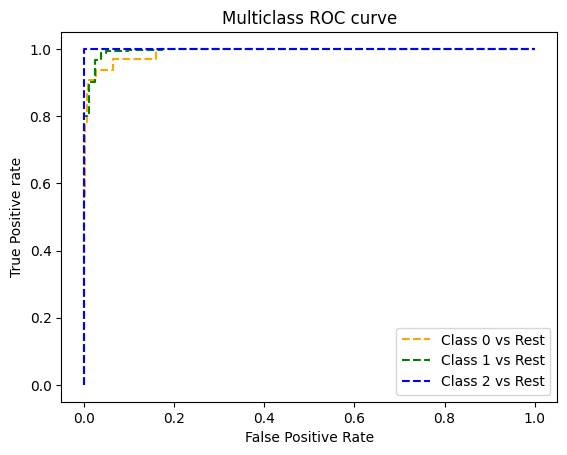

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
#IMBALANCE SMOTEENN DENGAN DATA TRAINING

In [ ]:
#DENGAN DATA TARAIN
to_smote = SMOTEENN(sampling_strategy="all",random_state=3)
x_smote, y_smote = to_smote.fit_resample(X_train,y_train)

In [ ]:
x_smote.shape
y_smote.shape

(3074,)

In [ ]:
x_smote.to_csv('x_smoteenn.csv')

In [ ]:
y_smote.to_csv('y_smoteenn.csv')

In [ ]:
# Number of trees in random forest

n_estimators = [100,200,300, 400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [ 2, 4, 6 ]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2,3,4,5,6,7]


In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
}
print(param_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 3, 4, 5, 6, 7]}


In [ ]:
rf_Model = RandomForestClassifier(random_state=1)

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2)

In [ ]:
rf_Grid.fit(x_smote, y_smote)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_Model_smote = RandomForestClassifier(n_estimators=100,  max_depth=8, max_features='auto', min_samples_leaf=2, min_samples_split= 2)

In [ ]:
rf_Model_smote.fit(x_smote, y_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', min_samples_leaf=2)

In [ ]:
rf_Model_smote.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1605935313),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1015212340),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=886314013),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1031372521),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1258317883),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=1801548958),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        random_state=562976548),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                        rand

In [ ]:
print(len(rf_Model_smote.estimators_))

100


In [ ]:
fn = ['pm10','pm25','so2','co','o3','no2']
cn = ['BAIK', 'SEDANG','TIDAK SEHAT']

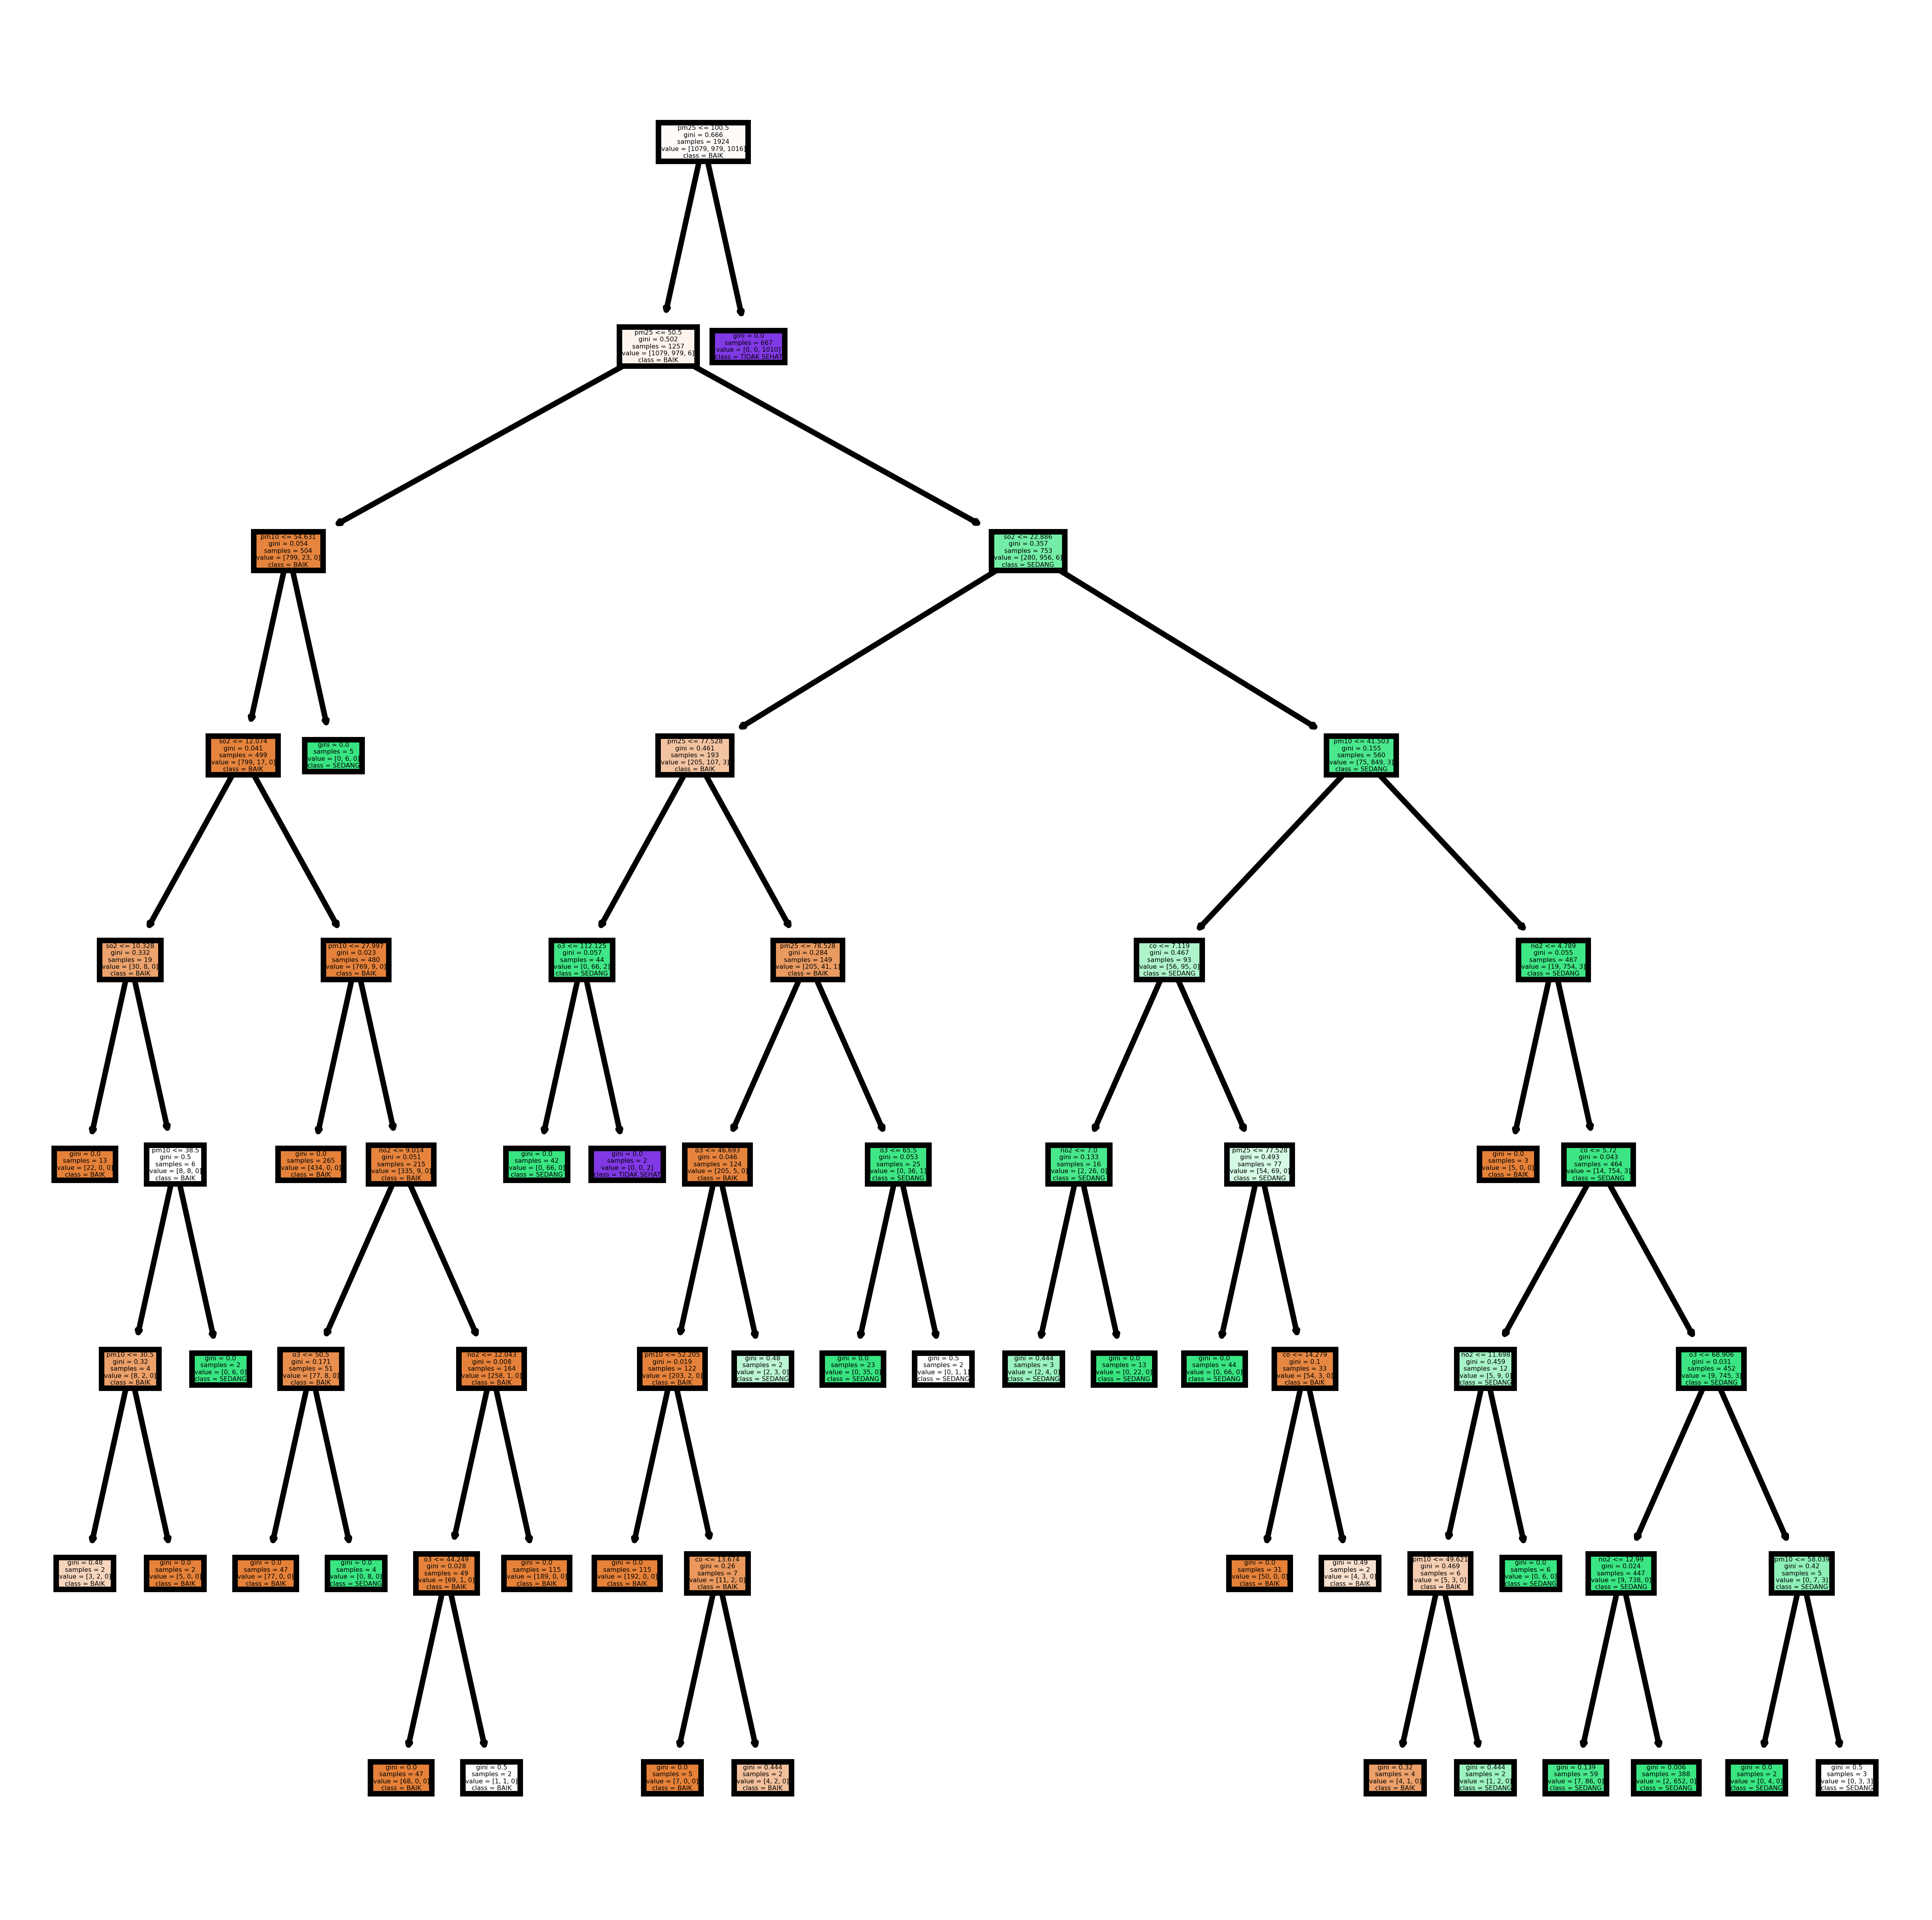

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=1000)
tree.plot_tree(rf_Model_smote.estimators_[1],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_indiviual_smote.png')

In [ ]:
import pickle
with open ('rf_Model_smoteenn.pickle','wb') as f:
 pickle.dump(rf_Model_smote,f)
with open ('rf_Model_smoteenn.pickle','rb') as f:
 model_smote = pickle.load(f)
model_smote

RandomForestClassifier(max_depth=8, max_features='auto', min_samples_leaf=2)

In [ ]:
ypred_tr_smote = model_smote.predict(x_smote)
ypred_ts_smote = model_smote.predict(X_test)

In [ ]:
print("Training Results:\n")
print(classification_report(y_smote, ypred_tr_smote))
print("\n\nTesting Results:\n")
print(classification_report(y_test, ypred_ts_smote))

Training Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1062
           1       0.99      1.00      1.00       953
           2       1.00      1.00      1.00      1059

    accuracy                           1.00      3074
   macro avg       1.00      1.00      1.00      3074
weighted avg       1.00      1.00      1.00      3074



Testing Results:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.99      0.99      0.99       281
           2       1.00      1.00      1.00        49

    accuracy                           0.98       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.98      0.98      0.98       362



In [ ]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_test, ypred_ts_smote)
print(cm1)


Confusion matrix
[[ 29   3   0]
 [  3 278   0]
 [  0   0  49]]


In [ ]:
pred_smote = model_smote.predict_proba(X_test)

In [ ]:
auc = roc_auc_score(y_test, pred_smote, multi_class='ovr')
print('AUC Score: ', auc)

AUC Score:  0.9939838155177716


In [ ]:
auc = roc_auc_score(y_test, pred_smote, multi_class='ovo')
print('AUC Score: ', auc)

AUC Score:  0.9949770166073547


In [ ]:
#Memanggil Model yang sudah dibuat

In [ ]:
import pickle

with open ('rf_model.pickle','rb') as f:
 model = pickle.load(f)
model

RandomForestClassifier(max_depth=8, max_features='auto', min_samples_leaf=2,
                       n_estimators=200)

In [ ]:
import pickle

with open ('rf_Model_smoteenn.pickle','rb') as f:
 model_smote = pickle.load(f)
model_smote

RandomForestClassifier(max_depth=8, max_features='auto', min_samples_leaf=2)

In [ ]:
#data ISPU januari tahun 2020
df = pd.read_csv("data.csv")

In [ ]:
# Checking null values
print(df.isnull().sum())

tanggal       0
stasiun       0
pm10          1
pm25        155
so2           6
co            1
o3            1
no2          12
max           0
critical      0
categori      0
dtype: int64


In [ ]:

df["pm10"] = df["pm10"].replace(np.nan, 0)

df["pm25"] = df["pm25"].replace(np.nan, 0)

df["so2"] = df["so2"].replace(np.nan, 0)

df["co"] = df["co"].replace(np.nan, 0)

df["o3"] = df["o3"].replace(np.nan, 0)

df["no2"] = df["no2"].replace(np.nan, 0)

In [ ]:
df.to_csv('datauji.csv')

In [ ]:
df = df.drop(['tanggal','stasiun','max', 'critical'], axis=1)


In [ ]:
LE = LabelEncoder()
df['categori'] = LE.fit_transform(df['categori'])

In [ ]:
df.head()

,pm10,pm25,so2,co,o3,no2,categori
0,30.0,0.0,20.0,10.0,32.0,9.0,0
1,27.0,0.0,22.0,12.0,29.0,8.0,0
2,39.0,0.0,22.0,14.0,32.0,10.0,0
3,34.0,0.0,22.0,14.0,38.0,10.0,0
4,35.0,0.0,22.0,12.0,31.0,9.0,0


In [ ]:
X = df.drop(columns='categori',axis=1)
y = df['categori']

In [ ]:
ypred_ts_smote = model_smote.predict(X)

In [ ]:
print("\n\nTesting Results:\n")
print(classification_report(y, ypred_ts_smote))



Testing Results:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        70
           1       0.94      0.89      0.91        81
           2       0.00      0.00      0.00         4

    accuracy                           0.91       155
   macro avg       0.61      0.62      0.61       155
weighted avg       0.89      0.91      0.90       155



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('\nConfusion matrix')
cn = confusion_matrix(y, ypred_ts_smote)
print(cn)


Confusion matrix
[[69  1  0]
 [ 9 72  0]
 [ 0  4  0]]
